In [57]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

top200 = "datasets/Top200.csv"
topgenre = "datasets/Top10000genre.csv"

top200_df = pd.read_csv(top200)
topgenre_df = pd.read_csv(topgenre)

top200_df = top200_df.drop(columns=['Index','Song ID','Chord','Valence','Duration (ms)','Tempo','Liveness','Acousticness','Speechiness'])
topgenre_df = topgenre_df.drop(columns=['track_id','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])
# genre = []
# genre = (pd.unique(topgenre_df['genre']))
# genre200 = []
# genre200 = (pd.unique(top200_df['Genre']))
# genre200

# top200_df.columns
# top200_df.Genre.value_counts()
# pop_genre = top200_df[top200_df['Genre'].str.contains('pop')]
# pop_genre = top200_df[(top200_df['Genre'].str.contains('pop')) & (top200_df['Genre'].str.len()<2)]
top200_df.Genre= top200_df.Genre.str.replace('[','')
top200_df.Genre= top200_df.Genre.str.replace(']','')
top200_df.Genre = top200_df.Genre.str.split(',')
top200_df = top200_df.explode('Genre')
top200_df.Genre = top200_df.Genre.str.replace("\'", "")



/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_28711/1424953187.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace('[','')
/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_28711/1424953187.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace(']','')


In [59]:
#sorting music for word included (contains overlap)
pop_any = top200_df[top200_df.Genre.str.contains('pop')]
pop_any["new_genre"]="pop"
hiphop_any = top200_df[top200_df.Genre.str.contains('hip hop')]
hiphop_any["new_genre"]="hip hop"
rap_any = top200_df[top200_df.Genre.str.contains('rap')]
rap_any["new_genre"]="rap"
rb_any = top200_df[top200_df.Genre.str.contains('r&b')]
rb_any["new_genre"]="rb"
country_any = top200_df[top200_df.Genre.str.contains('country')]
country_any["new_genre"]="country"
rock_any = top200_df[top200_df.Genre.str.contains('rock')]
rock_any["new_genre"]="rock"
alt_any = top200_df[top200_df.Genre.str.contains('alternative')]
alt_any["new_genre"]="alt"
dance_any = top200_df[top200_df.Genre.str.contains('dance')]
dance_any["new_genre"]="dance"
edm_any = top200_df[top200_df.Genre.str.contains('edm')]
edm_any["new_genre"]="edm"
jazz_any = top200_df[top200_df.Genre.str.contains('jazz')]
jazz_any["new_genre"]="jazz"
indie_any = top200_df[top200_df.Genre.str.contains('indie')]
indie_any["new_genre"]="indie"
itl_any = top200_df[top200_df.Genre.str.contains('italiano')]
itl_any["new_genre"]="itl"
span_any = top200_df[top200_df.Genre.str.contains('reggaeton')]
span_any["new_genre"]="reggaeton"
trap_any = top200_df[top200_df.Genre.str.contains('trap')]
trap_any["new_genre"]="trap"
latin_any = top200_df[top200_df.Genre.str.contains('latin')]
latin_any["new_genre"]="latin"

/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_28711/3151836930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_any["new_genre"]="pop"
/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_28711/3151836930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiphop_any["new_genre"]="hip hop"
/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_28711/3151836930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [60]:
#setting other category 
genre_list = ['pop','hip hop','rap','r&b','country','rock','alternative','dance','edm','jazz','indie','italiano','reggaeton','trap','latin']
pattern = '|'.join(genre_list)
result = top200_df.loc[~(top200_df['Genre'].str.contains(pattern, case=False))]
other = result
other_genre = (pd.unique(result['Genre']))

In [64]:
df_list = [pop_any,hiphop_any,rap_any,rb_any,country_any,rock_any,alt_any,dance_any,edm_any,jazz_any,indie_any,itl_any,span_any,trap_any,latin_any]
new_genre_df = pd.concat(df_list)
new_genre_df.Streams = new_genre_df.Streams.str.replace('"', '')
new_genre_df.Streams = new_genre_df.Streams.str.replace(',', '')
new_genre_df["Streams"] = new_genre_df[["Streams"]].apply(pd.to_numeric)

new_genre_group = new_genre_df.groupby('new_genre')['Streams'].mean().reset_index()


In [ ]:

%matplotlib inline 
%matplotlib notebook
import pandas as pd
import numpy as np

num_pop = pop_any.Genre.count()
num_rap = rap_any.Genre.count()
num_hiphop = hiphop_any.Genre.count()
num_rb = rb_any.Genre.count()
num_country = country_any.Genre.count()
num_rock = rock_any.Genre.count()
num_alt = alt_any.Genre.count()
num_dance = dance_any.Genre.count()
num_edm = edm_any.Genre.count()
num_jazz = jazz_any.Genre.count()
num_indie = indie_any.Genre.count()
num_itl = itl_any.Genre.count()
num_span = span_any.Genre.count()
num_trap = trap_any.Genre.count()
num_latin = latin_any.Genre.count()
num_other = other.Genre.count()


In [ ]:
genre_df = pd.DataFrame ({'Genre':['Pop','Hip Hop','Rap','R&B','Rock','Dance','EDM','Indie','Reggaeton','Trap','Latin','Other'],
'frequency':[num_pop, num_hiphop,num_rap,num_rb,num_rock,num_dance,num_edm,num_indie,num_span,num_trap,num_latin,num_other]})
genre_df.head()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

plot = genre_df.plot.pie(y='frequency', figsize=(15, 15))

plt.title("Genre")

In [ ]:
# Color coated scatter plot with stream comparison + genre
top200_df.Streams = top200_df.Streams.str.replace('"', '')
top200_df.Streams = top200_df.Streams.str.replace(',', '')


In [ ]:
top200_df["Streams"] = top200_df[["Streams"]].apply(pd.to_numeric)

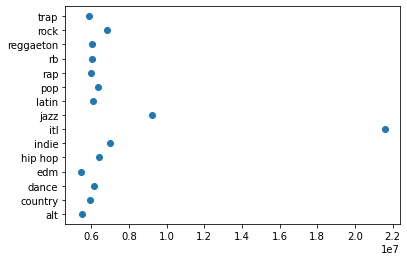

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
x_axis = new_genre_group['Streams']
y_axis = new_genre_group['new_genre']
plt.scatter(x_axis, y_axis)


In [ ]:
# These artist are multi genre artist (not all data/ artist specific)  

In [ ]:
# How many weeks a song is on a chart vs. number of streams (scatter plot) data of top 50 songs that ranked #1 (write axis to hover for song information)
# From date of song release to how long it took to hit the chart
